In [1]:
%load_ext autoreload
%autoreload 2

from Operators.genetic_algorithm import *
from Operators.evaluation import *

In [2]:
   # Define the parameter grid
param_grid = {
        "POP_SIZE": [100],
        # "max_gen": [50, 100],
        "mut_prob": [0.1],#, 0.3],
        "xo_prob":  [0.9],
        "mutation": [single_player_swap_2teams, single_player_shift_all_teams, full_position_swap_2teams],
        "crossover": [crossover_swap_whole_position, crossover_swap_extreme_player],
        "selection_algorithm": [roulette_selection, tournament_selection],
        "elitism":[True, False]}

In [3]:
#    # Define the parameter grid
# param_grid = {
#         "POP_SIZE": [50, 100],
#         "max_gen": [50, 100],
#         "mut_prob": [0.1, 0.2],#, 0.3],
#         "xo_prob":  [0.9],
#         "mutation": [single_player_swap_2teams, single_player_shift_all_teams, full_position_swap_2teams],
#         "crossover": [crossover_swap_whole_position, crossover_swap_extreme_player],
#         "selection_algorithm": [roulette_selection, tournament_selection]}


In [4]:
run_grid_search(
    param_grid=param_grid,
    n_runs=30,
    max_gen=40,
    filepath="Data/players(in).csv",           
    summary_path="ga_summary_elit.csv",            
    output_folder="fitness_logs_elit"              # folder to save 30x200 convergence logs
)


Grid Search Progress: 100%|██████████| 24/24 [1:08:19<00:00, 170.80s/config]


Summary saved to: ga_summary_elit.csv


In [24]:
fitness_dfs = load_fitness_dfs("fitness_logs")

In [25]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teamscrossover=crossover_swap_whole_positionselection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection', 'POP=100 X

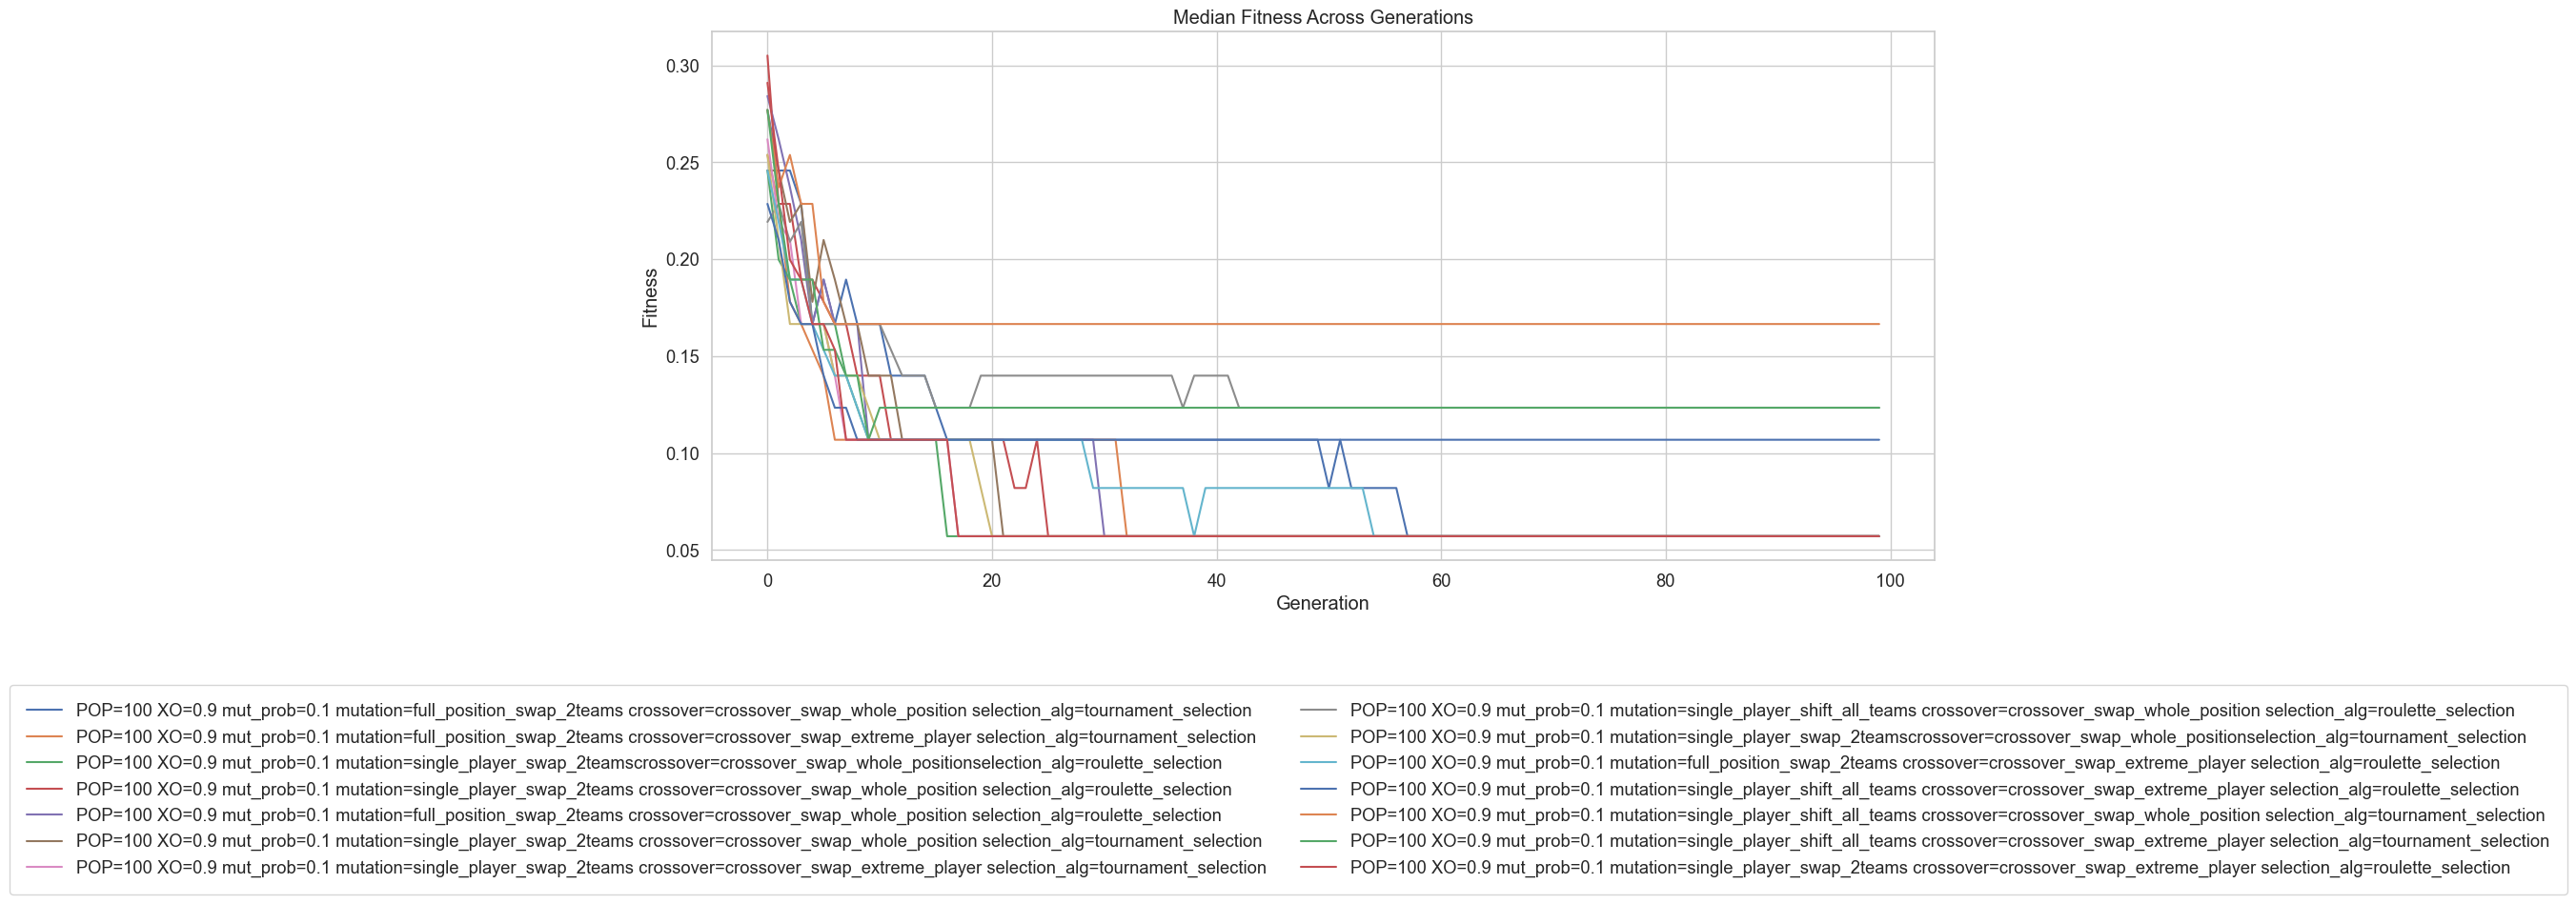

In [26]:
plot_median_fitness_over_gen(fitness_dfs)

Column‐wise impact analysis
Population Size (POP_SIZE = 100 only)
You tested only one size, so no variance to compare—we can’t conclude its effect here.

Mutation Probability (mut_prob = 0.1 only)
Also held constant across experiments. No insight into its sensitivity.

Crossover Probability (xo_prob = 0.9 only)
Same story—fixed at 0.9, so its impact remains untested.

Mutation Operator

single_player_swap_2teams consistently hits the optimal fitness.

We see only that mutation, so we lack data on alternatives (e.g. shift).

Impact: likely significant, but you need to compare against other mutation schemes.

Crossover Operator

crossover_swap_whole_position with either selection gives perfect zero‐variance best.

crossover_swap_extreme_player showed higher variance (std≈0.012), worse mean.

Impact: switching to “whole‐position” strongly improves consistency and quality.

Selection Algorithm

Tournament and Roulette both achieve the same optimum when paired with whole‐position crossover.

However, Roulette did show small variance (std≈0.0088) when elitism was on.

Impact: comparatively minor—tournament and roulette both work, but tournament may edge out for zero‐variance.

Elitism

False (no elitism) yields perfect convergence (std=0).

True gave slight variation under Roulette (std≈0.0089).

Impact: turning elitism off seems beneficial in your setup, improving consistency.

## 2. Grid Search for probability

In [ ]:
param_grid = {
        "POP_SIZE": [50, 100],
        "mut_prob": [0.1, 0.3, 0,5, 0.9],
        "xo_prob":  [0.9, 0.5, 0.3, 0.1],
        "mutation": [single_player_swap_2teams],
        "crossover": [crossover_swap_whole_position],
        "selection_algorithm": [roulette_selection],
        "elitism":[False]}

In [ ]:
run_grid_search(
    param_grid=param_grid,
    n_runs=30,
    max_gen=40,
    filepath="Data/players(in).csv",           
    summary_path="ga_summary2.csv",            
    output_folder="fitness_logs2"              # folder to save 30x200 convergence logs
)


Grid Search Progress: 100%|██████████| 60/60 [7:43:51<00:00, 463.85s/config]  


Summary saved to: ga_summary2.csv


In [27]:
fitness_dfs = load_fitness_dfs("fitness_logs2")

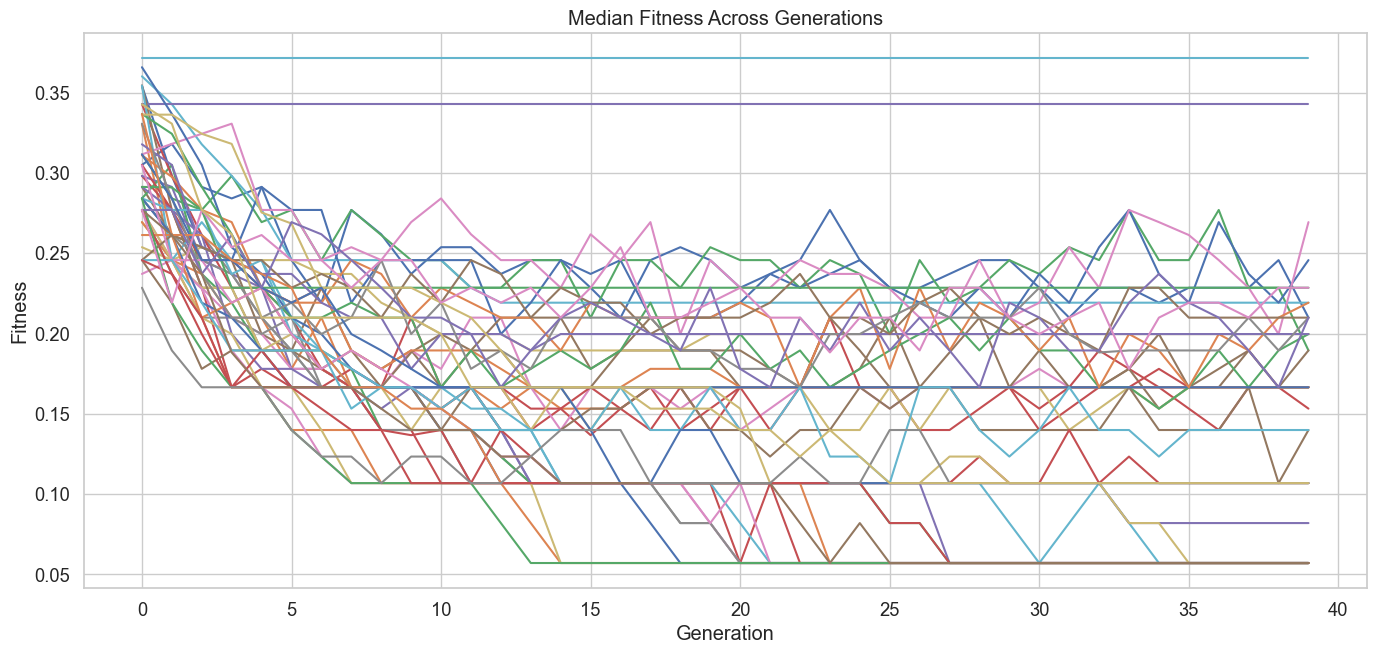

In [29]:
plot_median_fitness_over_gen(fitness_dfs)

In [30]:
param_grid = {
        "POP_SIZE": [50],
        "mut_prob": [0.1, 0.5, 1],
        "xo_prob":  [0.1, 0.5, 1],
        "mutation": [single_player_swap_2teams],
        "crossover": [crossover_swap_whole_position],
        "selection_algorithm": [roulette_selection],
        "elitism":[False]}

In [31]:
run_grid_search(
    param_grid=param_grid,
    n_runs=30,
    max_gen=40,
    filepath="Data/players(in).csv",           
    summary_path="ga_summary3.csv",            
    output_folder="fitness_logs3"              # folder to save 30x200 convergence logs
)

Grid Search Progress: 100%|██████████| 9/9 [31:12<00:00, 208.05s/config]


Summary saved to: ga_summary3.csv


In [32]:
fitness_dfs = load_fitness_dfs("fitness_logs3")

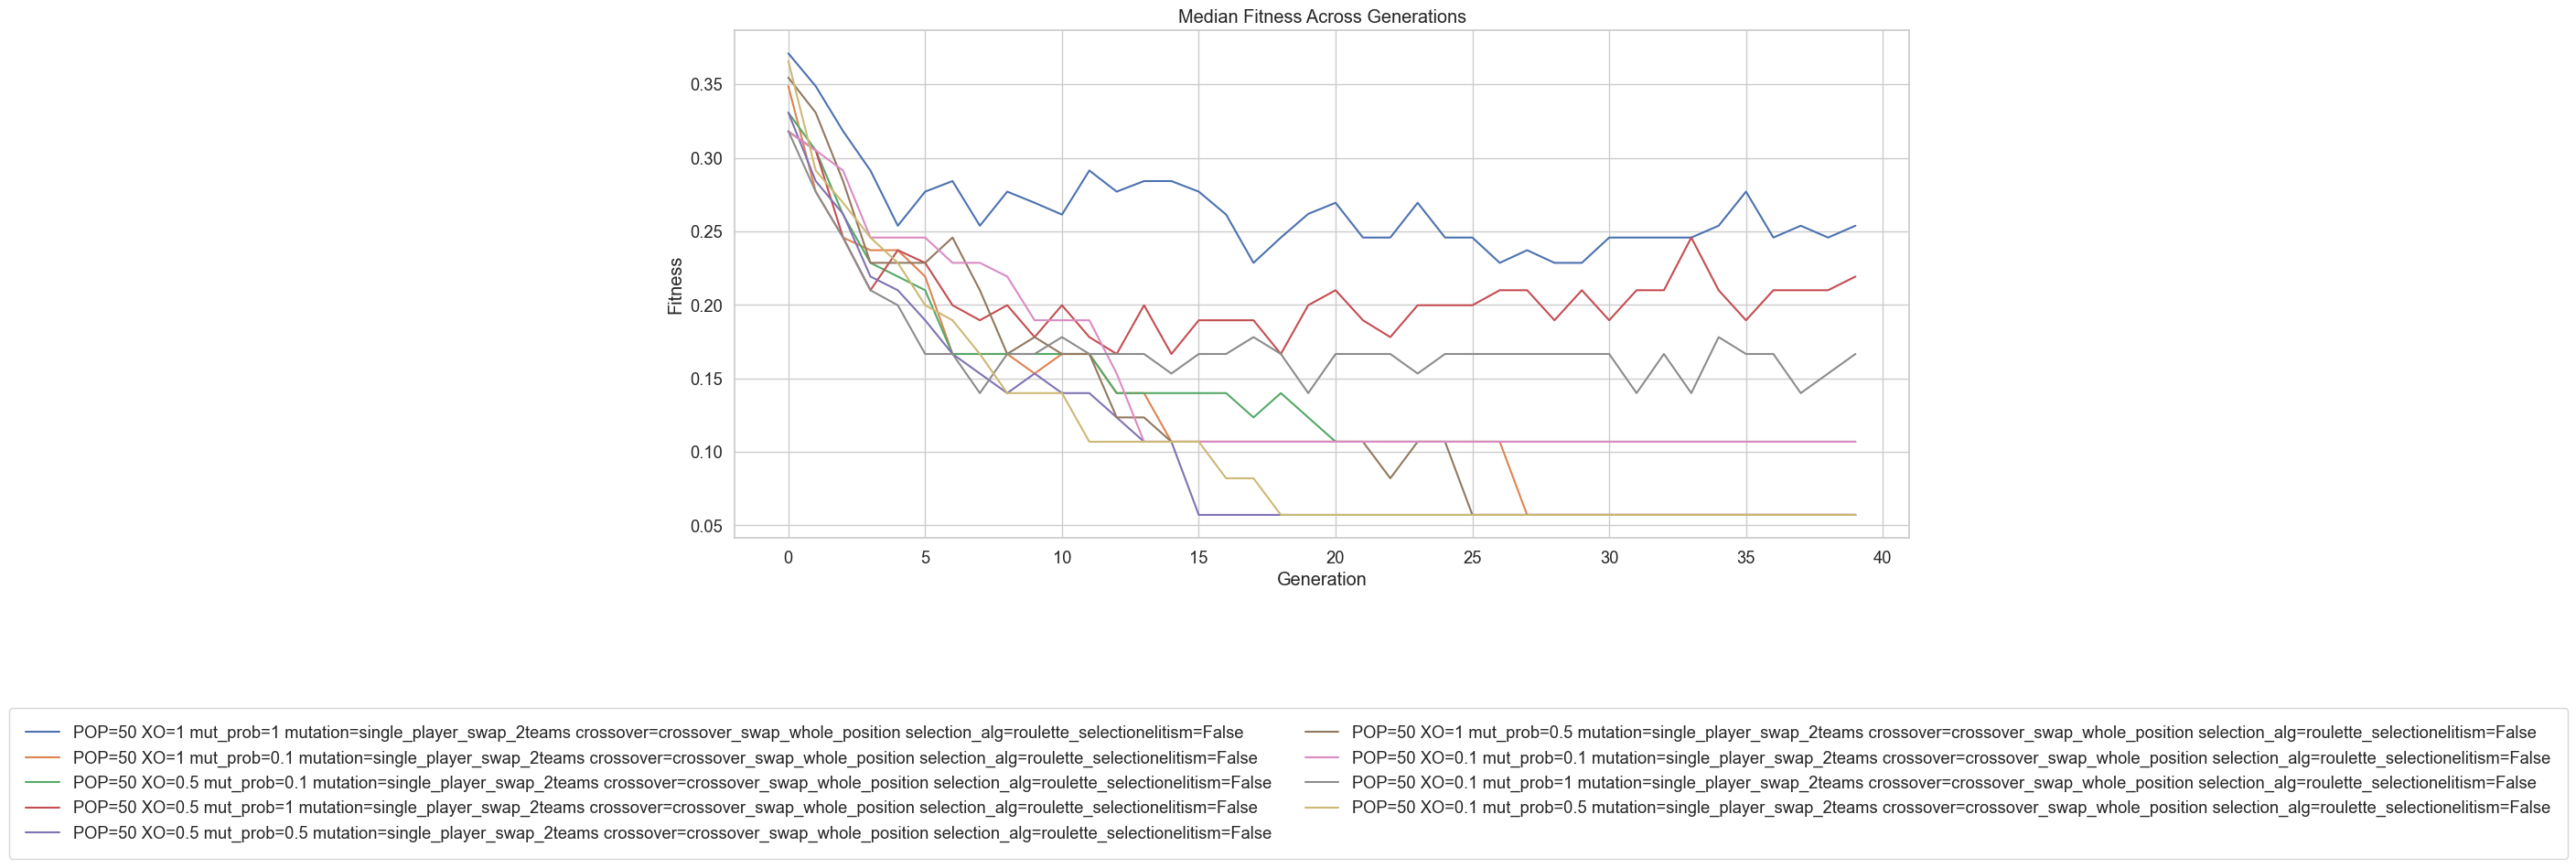

In [33]:
plot_median_fitness_over_gen(fitness_dfs)